In [750]:
import numpy as np
import pandas as pd

In [751]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [752]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [753]:
# 1 - Data cleaning  
# 1.1 - Drop the columns with max NAN values
# 1.2 - Renaming the colums to Target and Text 
# 1.3 - Apply Label Encoder on targeted column
# 1.4 - check and remove duplicate columns

# 2 - EDA
# 2.1- apply pie chart visualization on Target column to find the percentage of ham and spam 
# 2.2- Now for deeper anallysis we made 3 more columns by using nltk library. 
#      i > no. of characters in the sms 
#      ii> no. of words in the sms 
#      iii> no. of sentences in the sms
# 2.3- Now apply .descibe() seprately to ham and spam and analyze 
# 2.4- apply histogram or any graph to analyze 
# 2.5- Analyze by using heatmap

# 3 - Text preprocessing 
# Lower case
# Tokenization 
# Remove Special Characters
# Removing stopwords and punctuation
# Stemming

# 4 - Model building
# 5 - Evaluation 
# 6 - Improvement 
# 7 - Website
# 8 - Deployement 

## Data Cleaning

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [755]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [756]:
# droping the column with majority of NAN values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [757]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [758]:
df.rename(columns={'v1' : 'Target','v2' : 'Text'},inplace=True)

In [759]:
df.columns

Index(['Target', 'Text'], dtype='object')

In [760]:
## Apply label encoder on Target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])

In [761]:
df.head(3)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [762]:
## check duplicated value
df.duplicated().sum()

np.int64(403)

In [763]:
df.shape

(5572, 2)

In [764]:
## drop duplicated columns
df.drop_duplicates(inplace=True)

In [765]:
df.shape

(5169, 2)

## EDA

In [766]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

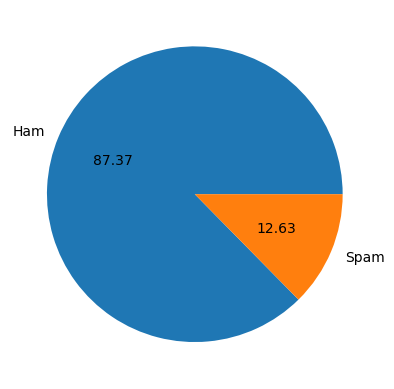

In [767]:
## Pychart for visualization
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts() , labels=['Ham','Spam'], autopct='%0.2f')
plt.show

In [768]:
## Add some more columns by using nltk library
import nltk 
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\faraz
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\faraz
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [769]:
df['char_count']=df['Text'].apply(len)

In [770]:
df['word_count']=df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [771]:
df['sent_count']=df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [772]:
df.head()

,Target,Text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [773]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [774]:
## Ham
df[df['Target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [775]:
## Spam
df[df['Target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

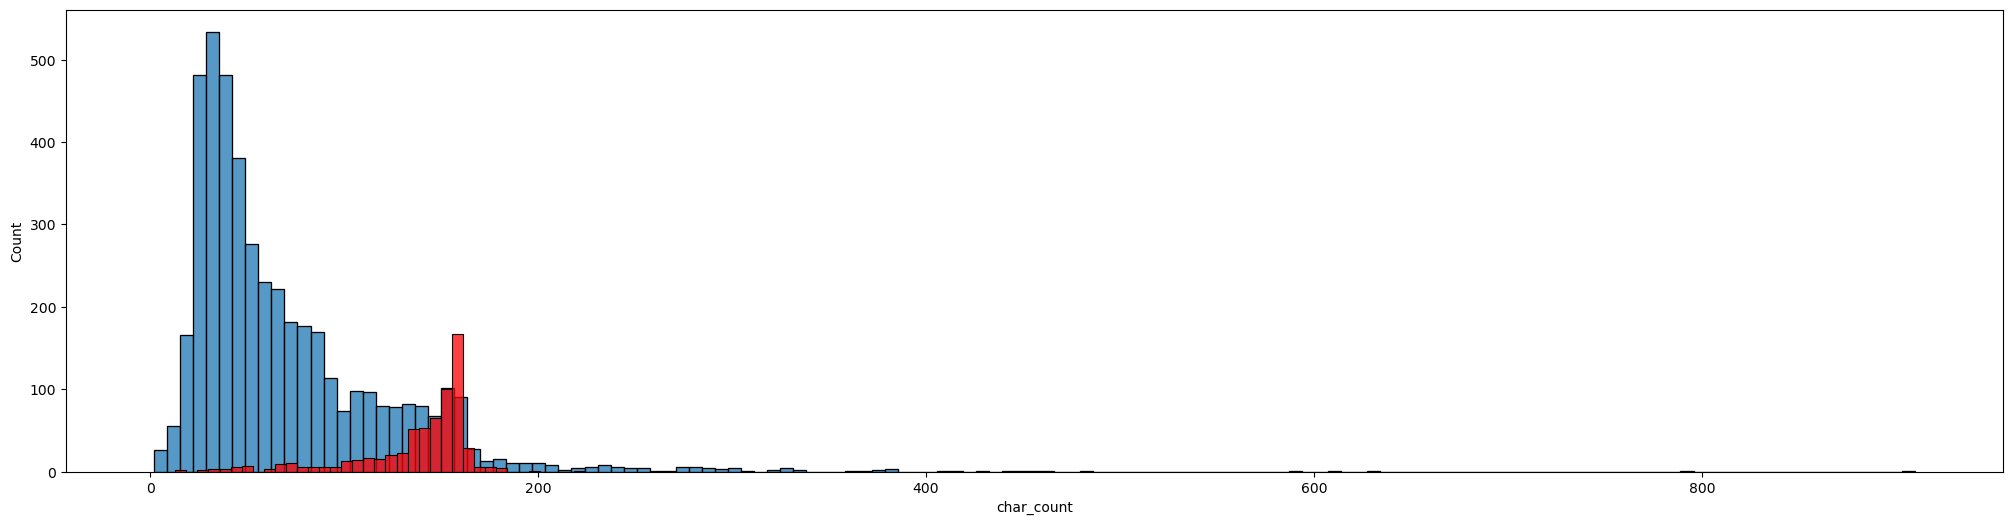

In [776]:
## plot histogram for char_count
import seaborn as sns
plt.figure(figsize=(25,6))
sns.histplot(df[df['Target']==0]['char_count'])
sns.histplot(df[df['Target']==1]['char_count'],color='r')

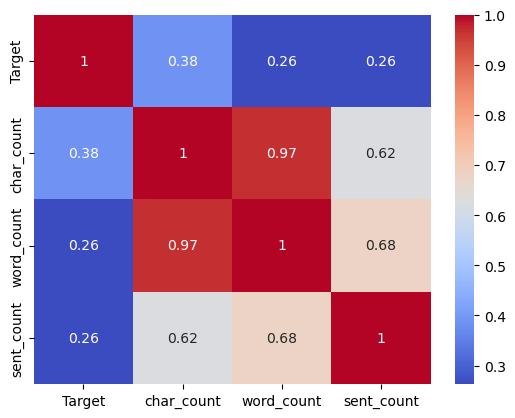

In [777]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()
## sns.heatmap(df.corr())
## complicated because not directly support for text on vs code but work properly on jupyternotebook

## Data Preprocessing

In [778]:
# Lower case
# Tokenization 
# Remove Special Characters
# Removing stopwords and punctuation
# Stemming

In [779]:
## for removing stopwords and punctuation
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [780]:
## for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [781]:

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) 

In [782]:
df['Transformed Text']=df['Text'].apply(transform)

In [783]:
df.head(3)

,Target,Text,char_count,word_count,sent_count,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


## Model Building

In [784]:
## first we have to convert text into vectors 
## After that apply Naive Bayes because for textual data naive bayes performs best

In [785]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [786]:
x1=cv.fit_transform(df['Transformed Text']).toarray()
x2=tfidf.fit_transform(df['Transformed Text']).toarray()

In [787]:
y=df['Target'].values

In [788]:
## for CountVectorizer() 

In [789]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=2)

In [790]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [791]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [792]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [793]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [794]:
## for TfidfVectorizer(max_features=3000)

In [795]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=2)

In [796]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [797]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [798]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [799]:
## We get the best result by tfidf ---> mnb
## Accuracy - 97 %
## Precision - 100 %

In [801]:
## Creating pipeline
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl' , 'wb'))